# Portfolio with the Maximum Calmar Ratio for the Private Banks Sector 

In [9]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS', 
         'FEDERALBNK.NS', 'IDFCFIRSTB.NS', 'CUB.NS', 'RBLBANK.NS' ]



#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  \
Date                                                               
2017-01-03    -0.006033      0.009677     -0.004276     0.016612   
2017-01-04    -0.003705     -0.013056     -0.022952    -0.004734   
2017-01-05     0.000590      0.024197      0.004804     0.010865   
2017-01-06     0.006261      0.003492      0.025287    -0.006241   
2017-01-09     0.001298      0.002128     -0.010658    -0.005397   
...                 ...           ...           ...          ...   
2020-12-28     0.011210      0.012674      0.014331     0.012135   
2020-12-29     0.010106      0.016589      0.005215     0.020115   
2020-12-30     0.003707     -0.000095      0.009285    -0.008126   
2020-12-31     0.002649      0.011844     -0.011137    -0.007467   
2021-01-01    -0.007863     -0.014211     -0.000777     0.005385   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  RBLBANK.NS  
Date                                                                           
2017-01-03       0.012020       0.001513      -0.000823  0.020226    0.016246  
2017-01-04      -0.000409      -0.006065      -0.014091 -0.007584    0.012376  
2017-01-05       0.024601       0.026268       0.012443  0.027779    0.024018  
2017-01-06       0.014528      -0.004455       0.000000  0.027389    0.007179  
2017-01-09       0.013198       0.016968       0.020401  0.003955   -0.005062  
...                   ...            ...            ...       ...         ...  
2020-12-28       0.016456       0.033186       0.028828  0.021375    0.038941  
2020-12-29       0.051645       0.000000      -0.006789 -0.009937    0.016021  
2020-12-30      -0.015288      -0.002228      -0.001363 -0.012000   -0.001290  
2020-12-31      -0.004571      -0.008212       0.010855  0.011167   -0.006256  
2021-01-01       0.005794       0.020038       0.009402  0.001941    0.000000  

[988 rows x 9 columns]

In [11]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [13]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar  HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  \
0     0.091819  0.196735  0.466715     0.140226      0.145625      0.106798   
1     0.046366  0.105513  0.439434     0.089145      0.071675      0.039633   
2     0.140247  0.280225  0.500478     0.051841      0.261898      0.270425   
3     0.067532  0.121075  0.557767     0.075480      0.003516      0.189417   
4     0.070130  0.163885  0.427924     0.151592      0.131920      0.025720   
...        ...       ...       ...          ...           ...           ...   
9995  0.092034  0.175401  0.524706     0.102424      0.065110      0.207896   
9996  0.105397  0.217938  0.483610     0.161450      0.143550      0.141985   
9997  0.102286  0.207972  0.491826     0.163862      0.116924      0.150379   
9998  0.066927  0.140978  0.474735     0.097307      0.083483      0.101111   
9999  0.097308  0.207430  0.469111     0.043317      0.202086      0.164174   

      AXISBANK.NS  INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS    CUB.NS  \
0        0.005920       0.149525       0.152823       0.036297  0.109482   
1        0.005284       0.096633       0.194751       0.116772  0.134364   
2        0.008318       0.058110       0.050765       0.137267  0.042304   
3        0.037408       0.130141       0.195933       0.000157  0.176224   
4        0.198086       0.150559       0.014907       0.180628  0.013594   
...           ...            ...            ...            ...       ...   
9995     0.123357       0.143343       0.077891       0.129037  0.125739   
9996     0.089840       0.027714       0.076226       0.023344  0.177580   
9997     0.092351       0.010280       0.091990       0.080456  0.116470   
9998     0.176413       0.183041       0.147239       0.094046  0.006828   
9999     0.045009       0.064291       0.188160       0.010906  0.112244   

      RBLBANK.NS  
0       0.153306  
1       0.251744  
2       0.119072  
3       0.191724  
4       0.132994  
...          ...  
9995    0.025204  
9996    0.158310  
9997    0.177288  
9998    0.110532  
9999    0.169813  

[10000 rows x 12 columns]

In [14]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.081741
Drawdown         0.137619
Calmar           0.593967
HDFCBANK.NS      0.004192
ICICIBANK.NS     0.010921
KOTAKBANK.NS     0.299077
AXISBANK.NS      0.036297
INDUSINDBK.NS    0.144444
FEDERALBNK.NS    0.143303
IDFCFIRSTB.NS    0.019116
CUB.NS           0.292719
RBLBANK.NS       0.049930
Name: 4911, dtype: float64

In [15]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean             0.006434
Drawdown         0.014375
Calmar           0.447606
HDFCBANK.NS      0.019046
ICICIBANK.NS     0.003394
KOTAKBANK.NS     0.005226
AXISBANK.NS      0.164940
INDUSINDBK.NS    0.165739
FEDERALBNK.NS    0.220361
IDFCFIRSTB.NS    0.148914
CUB.NS           0.105231
RBLBANK.NS       0.167151
Name: 5485, dtype: float64

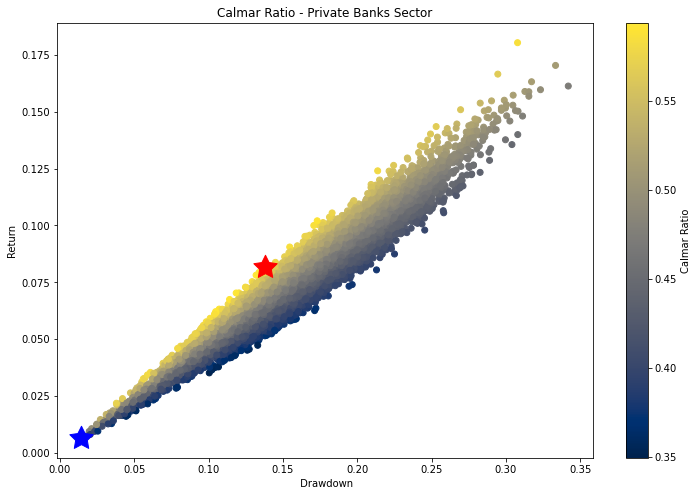

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - Private Banks Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()